# ❓ <font color='green'> <u> PROBLEM STATEMENT (SALARY DATA) </u>

## 🔵 <font color='blue'> Prepare a classification model using SVM for salary data 

### <font color='candy'>➡Data Description:
* **age** -- age of a person
* **workclass**	-- A work class is a grouping of work 
* **education**	-- Education of an individuals	
* **maritalstatus** -- Marital status of an individulas	
* **occupation** -- occupation of an individuals
* **relationship** 	
* **race** --  Race of an Individual
* **sex** --  Gender of an Individual
* **capitalgain** --  profit received from the sale of an investment	
* **capitalloss**	-- A decrease in the value of a capital asset
* **hoursperweek** -- number of hours work per week	
* **native** -- Native of an individual
* **Salary** -- salary of an individual


___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> Support Vector Machine (SVM)</u></font> algorithm is a <u>supervised machine learning</u> algorithm used in machine learning to solve classification, regression, and outlier detection problems. SVMs are particularly good at solving binary classification problems, which require classifying the elements of a data set into two groups.
    
+ ### SVMs are effective in high dimensional spaces and in cases where the number of dimensions is greater than the number of samples. They are also commonly employed in classification tasks because they are particularly efficient in high-dimensional fields.
    
+ ### SVM algorithms are not suitable for large data sets.

+ ### In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. 
    
+ ###  SVM aims to find the hyperplane that best separates data points of different classes in a high-dimensional space. 

+ ### The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin, providing a robust separation between classes.
    
+ ### C parameter: SVM has a regularization parameter (C) that balances the trade-off between achieving a smooth decision boundary and classifying the training points correctly.
    
+ ### Once the SVM is trained, the decision function classifies new data points by determining on which side of the hyperplane they fall.

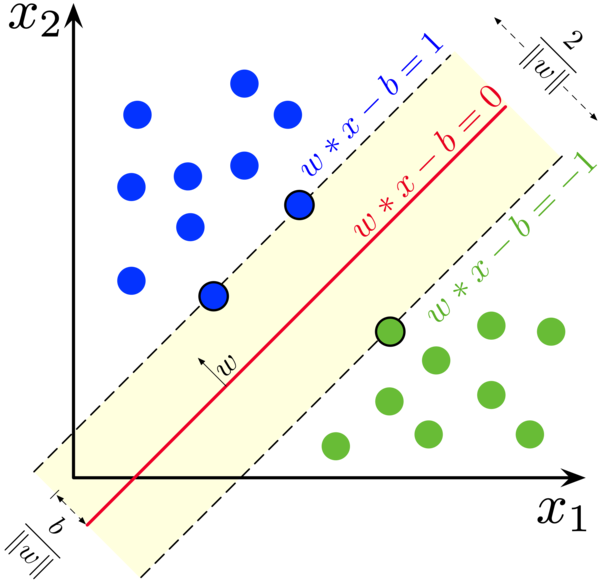

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 600
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
# Importing Training Dataset:

salary_train = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/SalaryData_Train.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
salary_train.shape

(30161, 14)

In [3]:
# Importing Testing Dataset
salary_test = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/SalaryData_Test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_test.shape

(15060, 14)

In [5]:
# Merging Train and Test Data
df = salary_train.append(salary_test)
df.reset_index(inplace=True)
df.drop(['index'],inplace=True,axis = 1)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [6]:
df.shape

(45221, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0
capitalloss,45221.0,88.548617,404.838249,0.0,0.0,0.0,0.0,4356.0
hoursperweek,45221.0,40.938038,12.007640,1.0,40.0,40.0,45.0,99.0


In [9]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
# Checking for Duplicate Records:
df.duplicated().sum()

5982

> * #### There are 45221 records and 14 Variables.
> * #### All variables are in proper data type, majority of them are object data type.
> * #### "Salary" is target column.
> * #### There is no null value observed.
> * #### We don't have specific primary key like "id", so we assume that there is no duplicated record.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

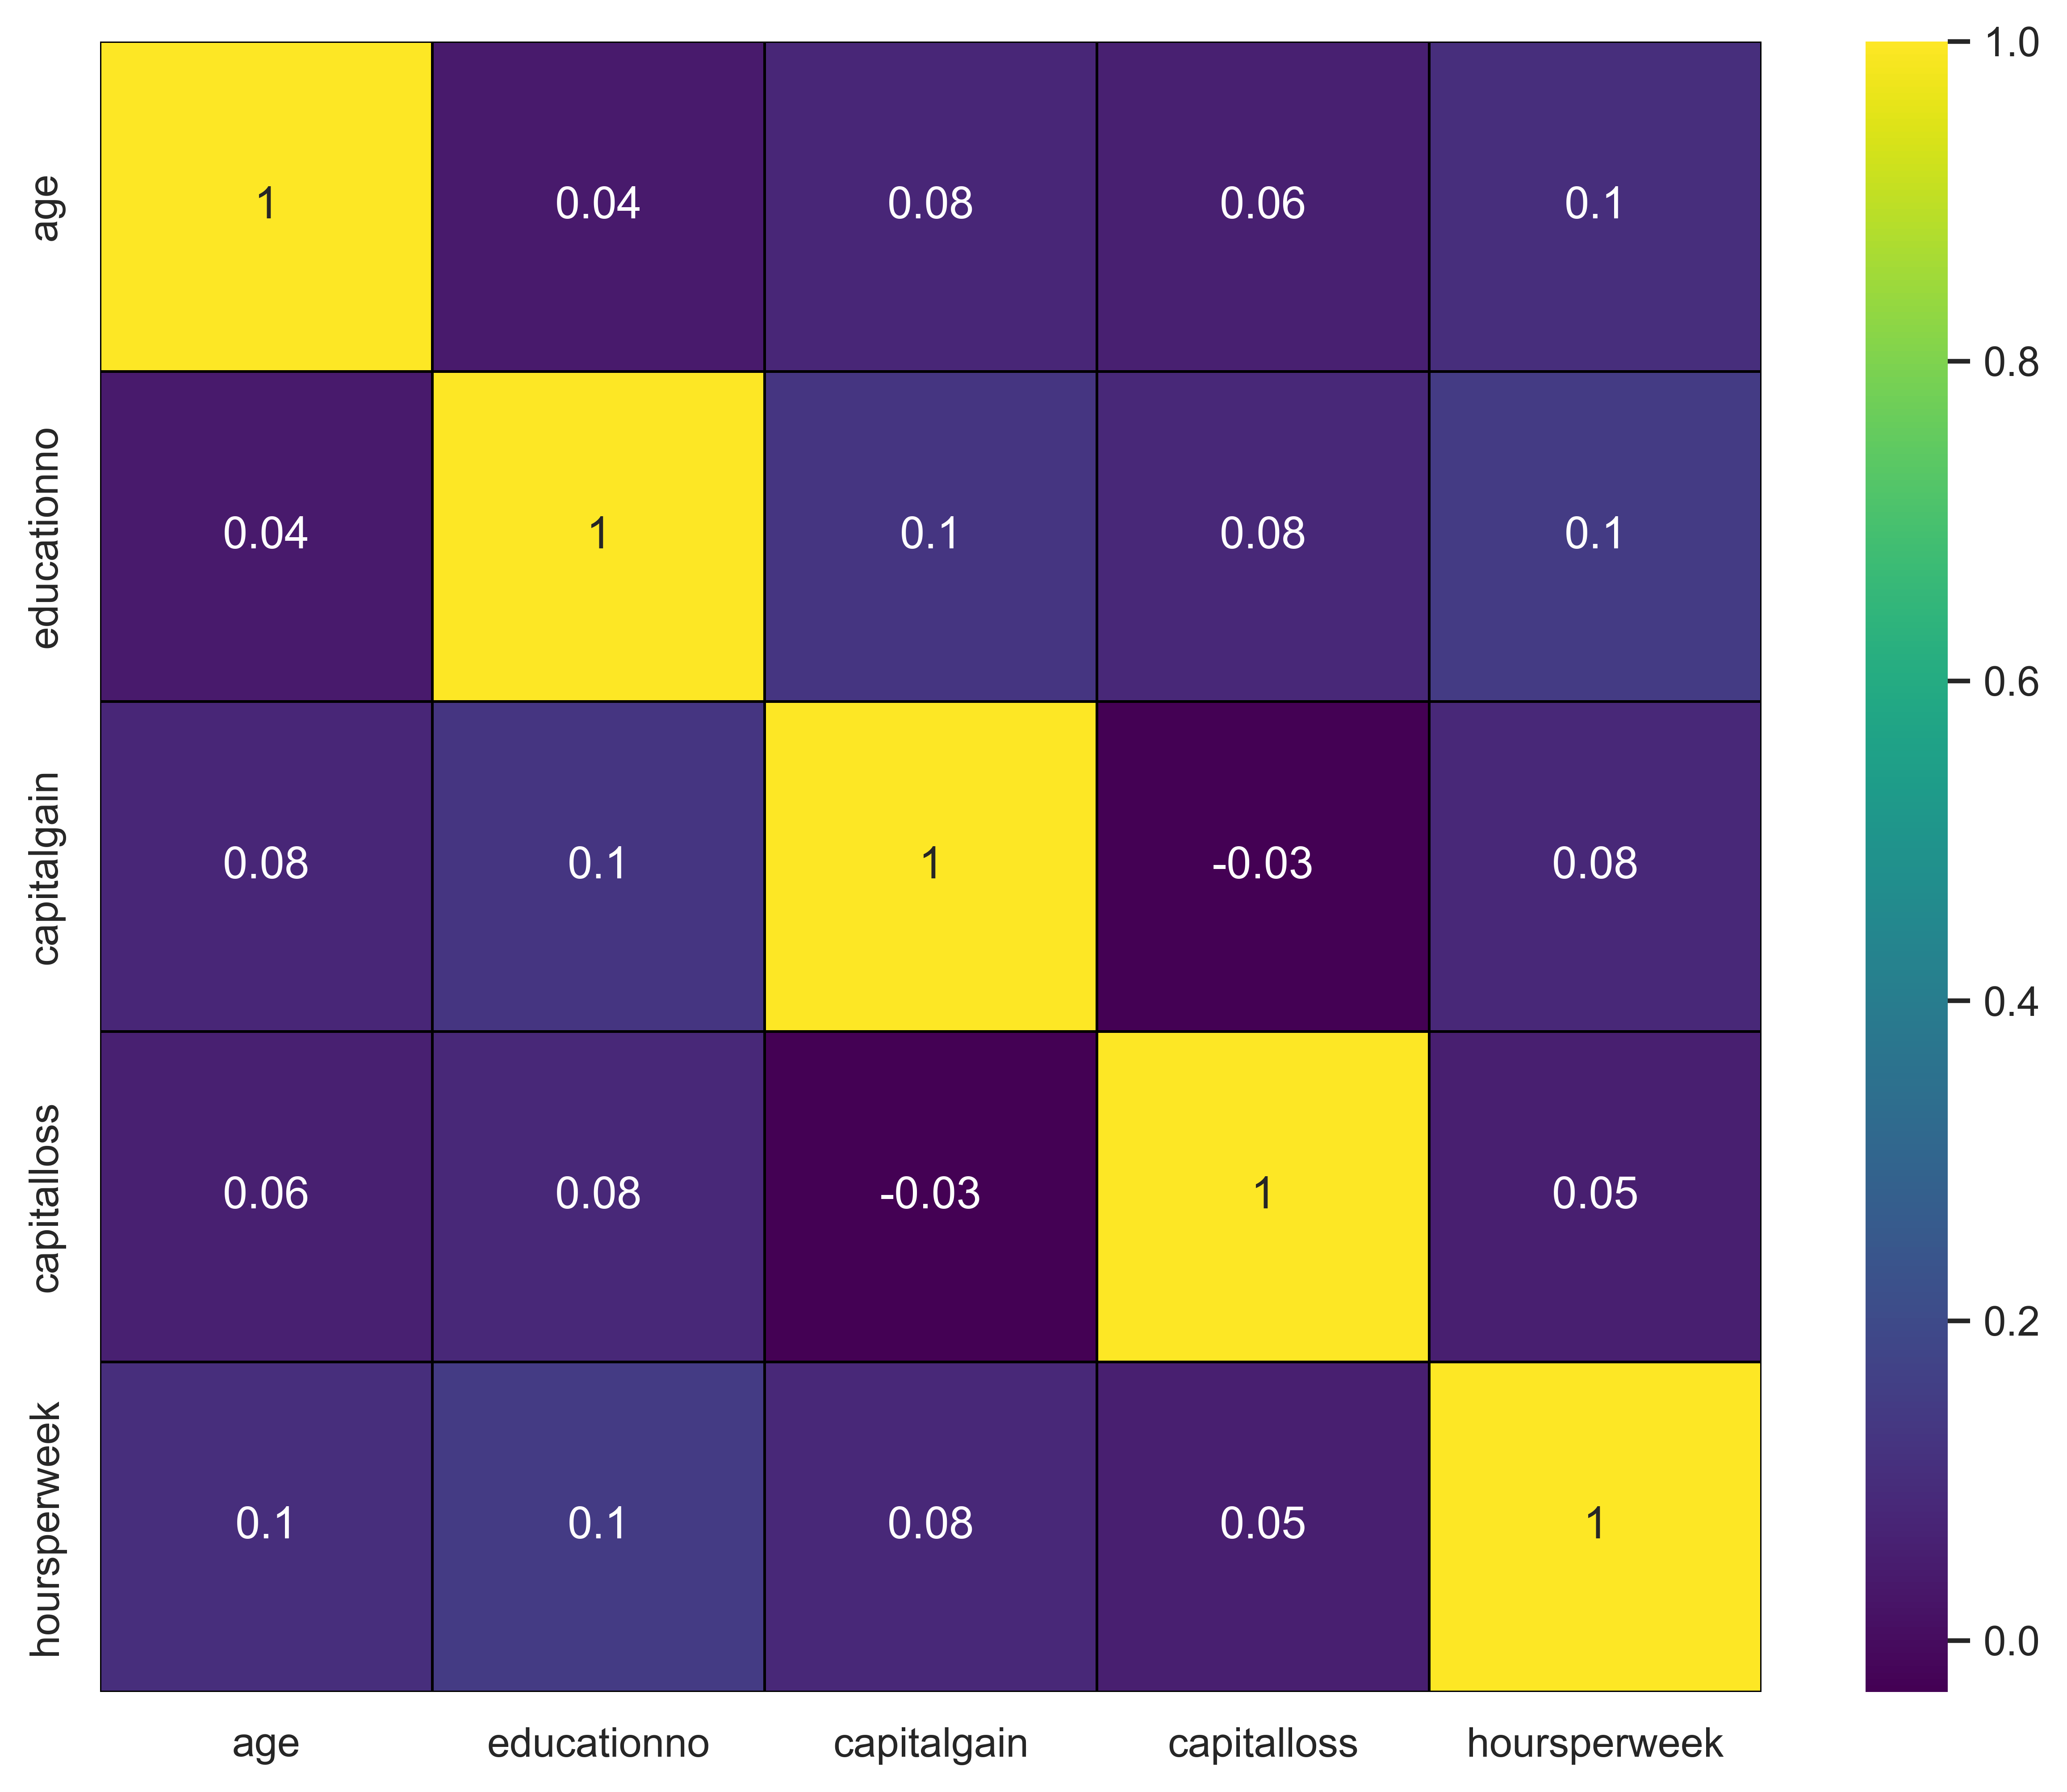

In [11]:
# Correation between Numerical variables:
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black')

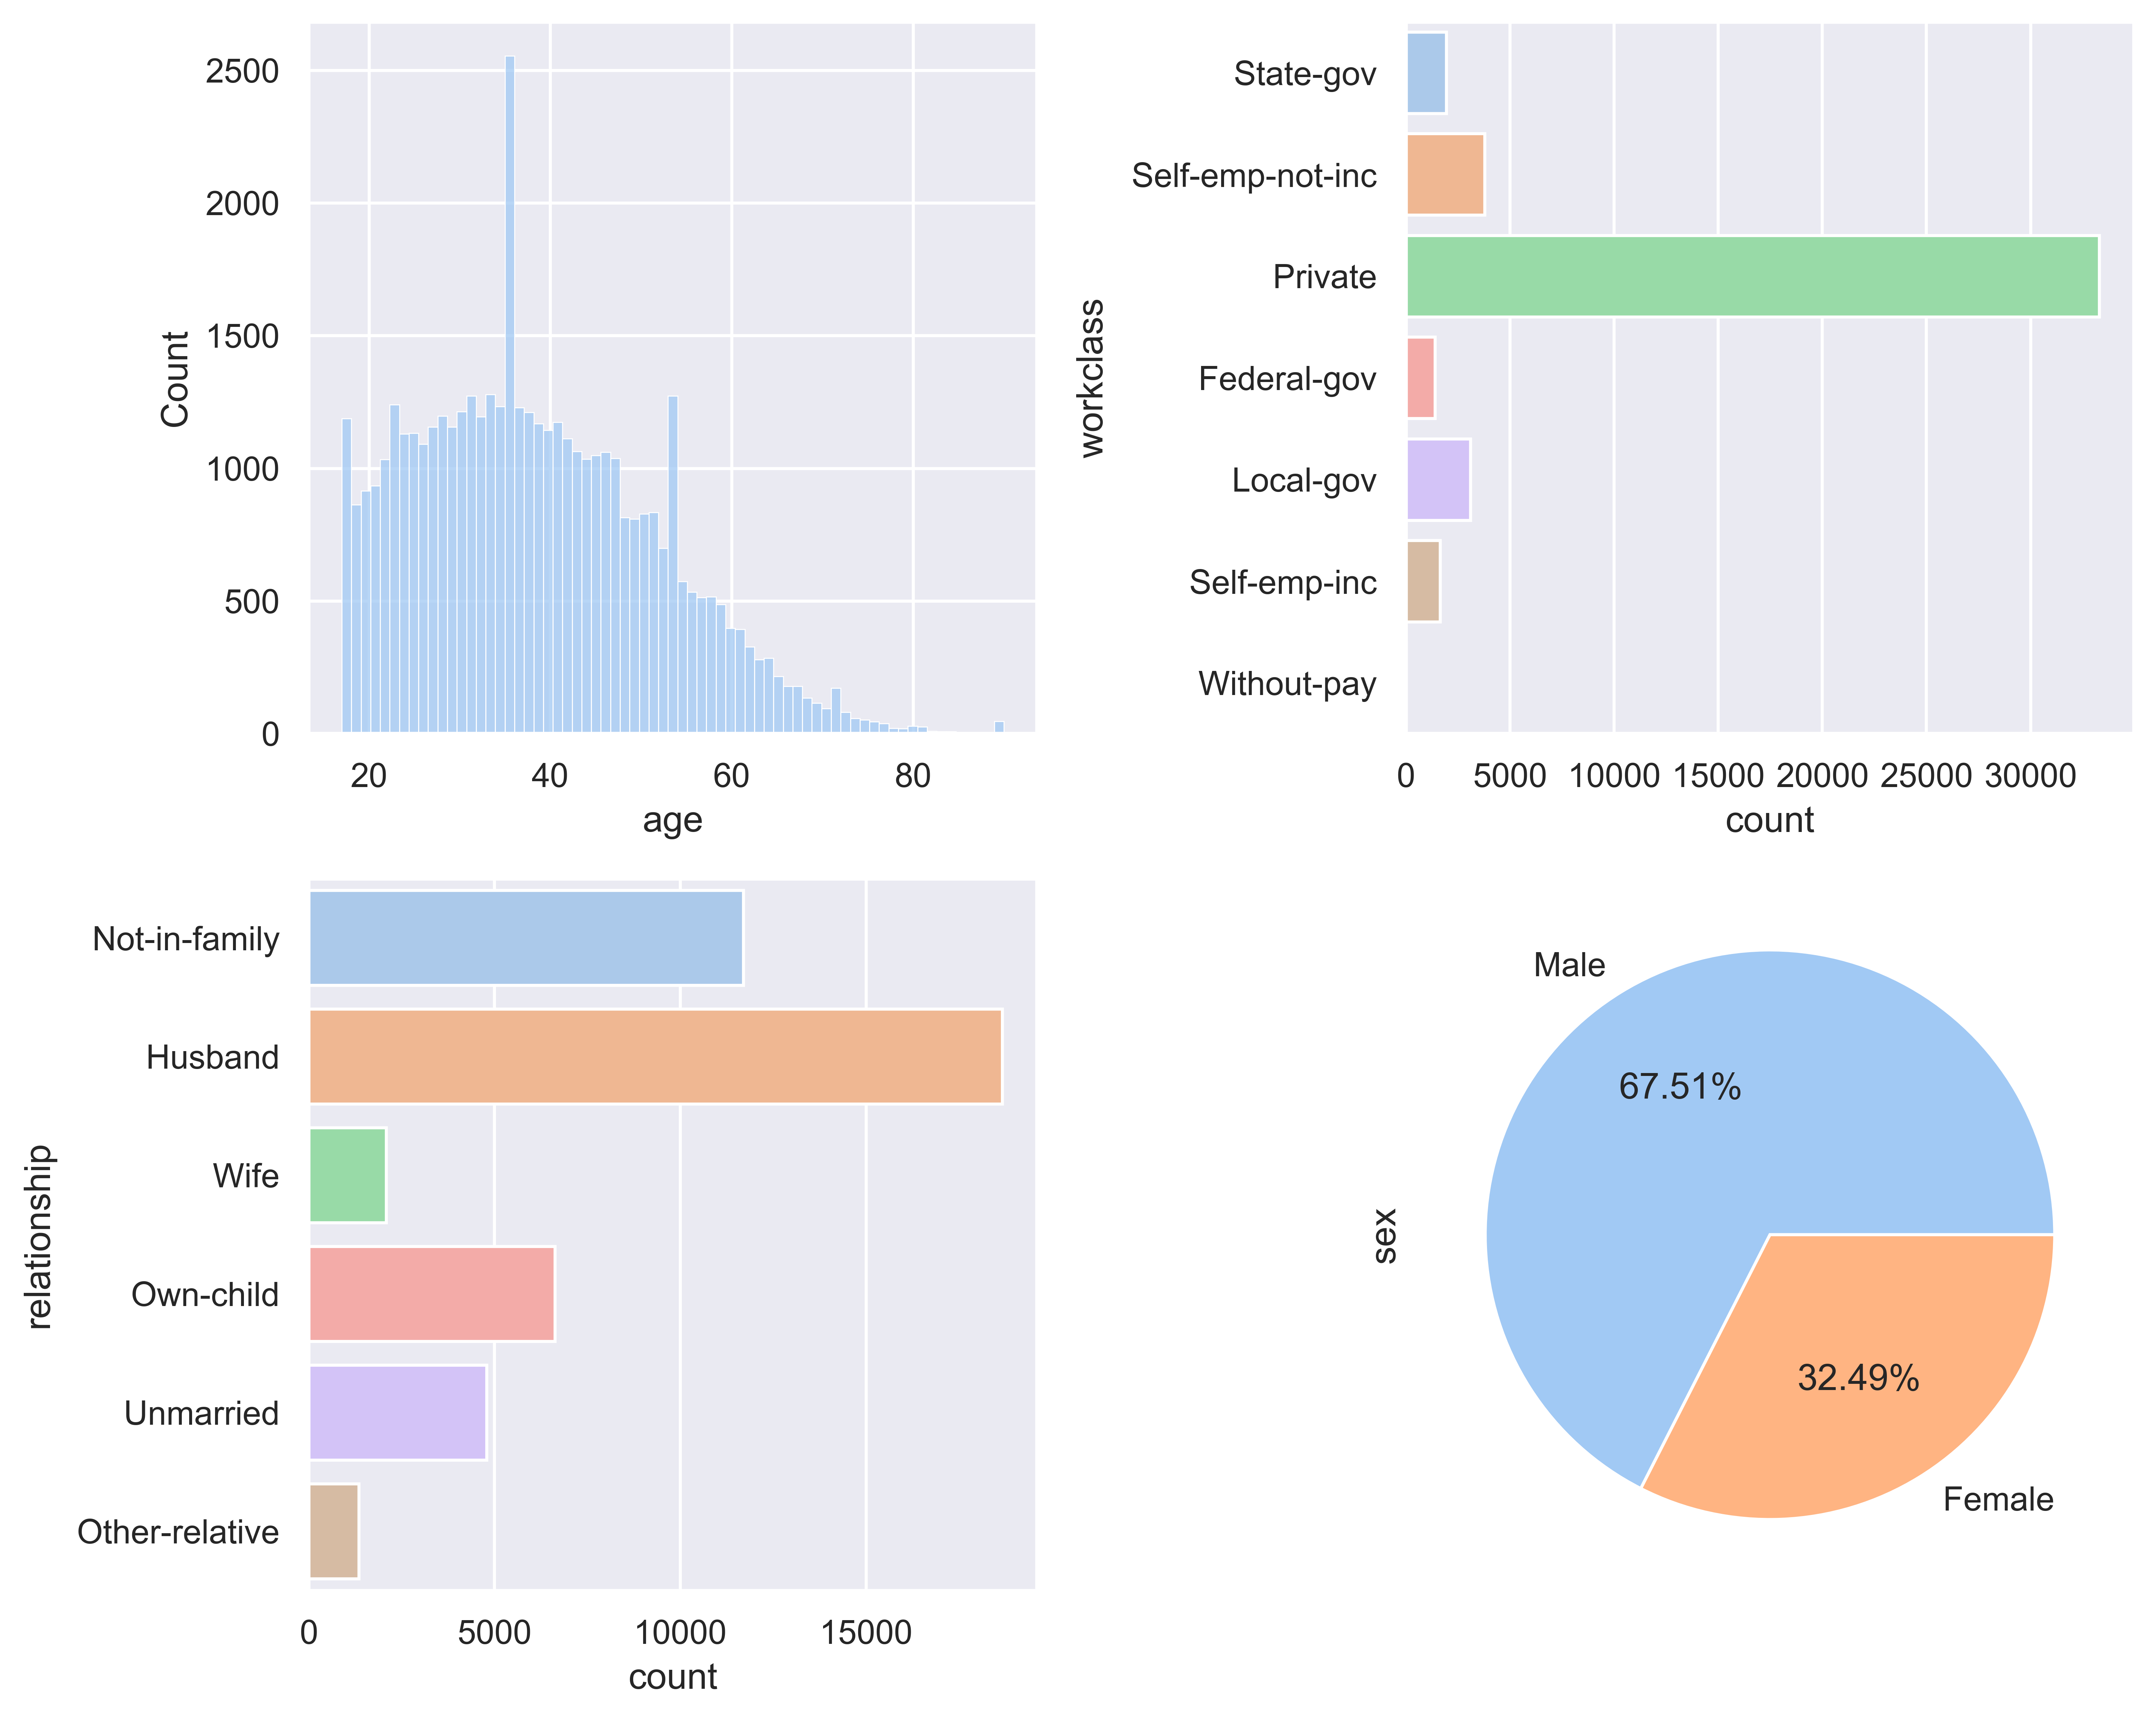

In [12]:
fig,index = plt.subplots(2,2)
sns.histplot(df['age'],ax = index[0,0])
sns.countplot(y = df['workclass'], ax = index[0,1])
sns.countplot(y = df['relationship'], ax = index[1,0])
df['sex'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', ax = index[1,1])
plt.tight_layout()

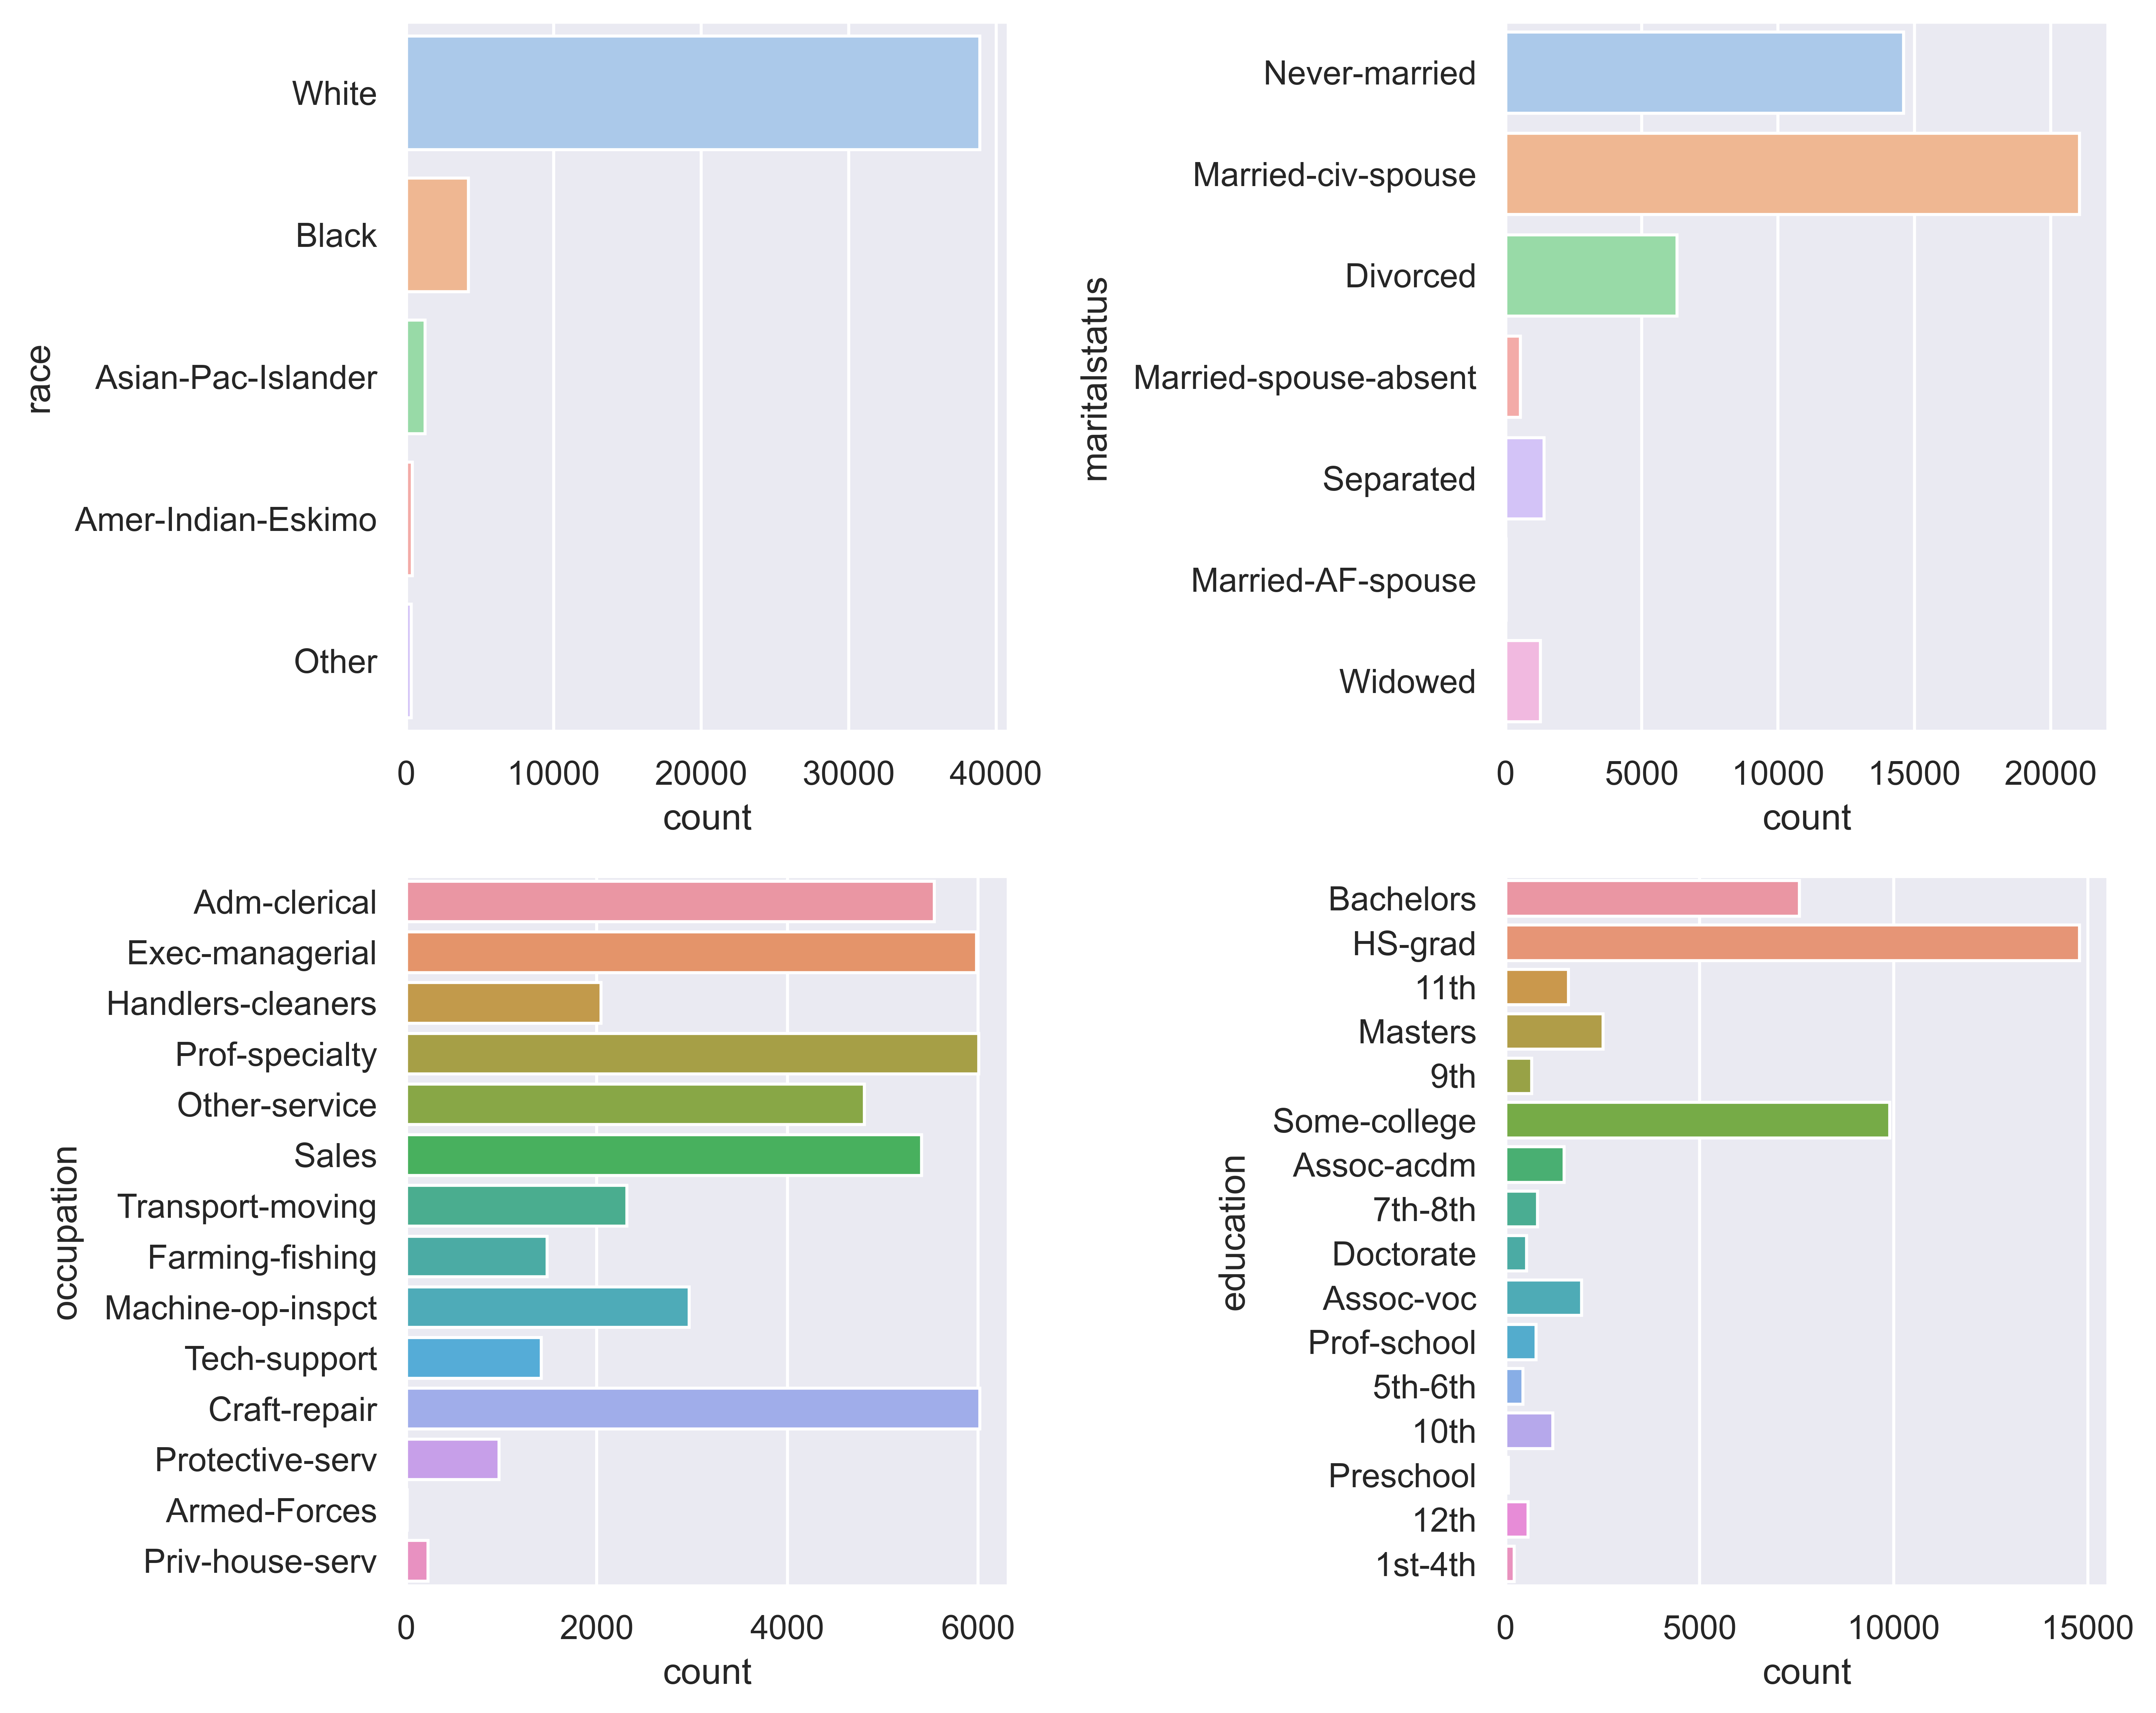

In [13]:
fig,index = plt.subplots(2,2)

sns.countplot(y = df['race'], ax = index[0,0])
sns.countplot(y = df['maritalstatus'], ax = index[0,1])
sns.countplot(y = df['occupation'], ax = index[1,0])
sns.countplot(y = df['education'], ax = index[1,1])
plt.tight_layout()

Text(0.5, 1.0, 'Barplot for Native')

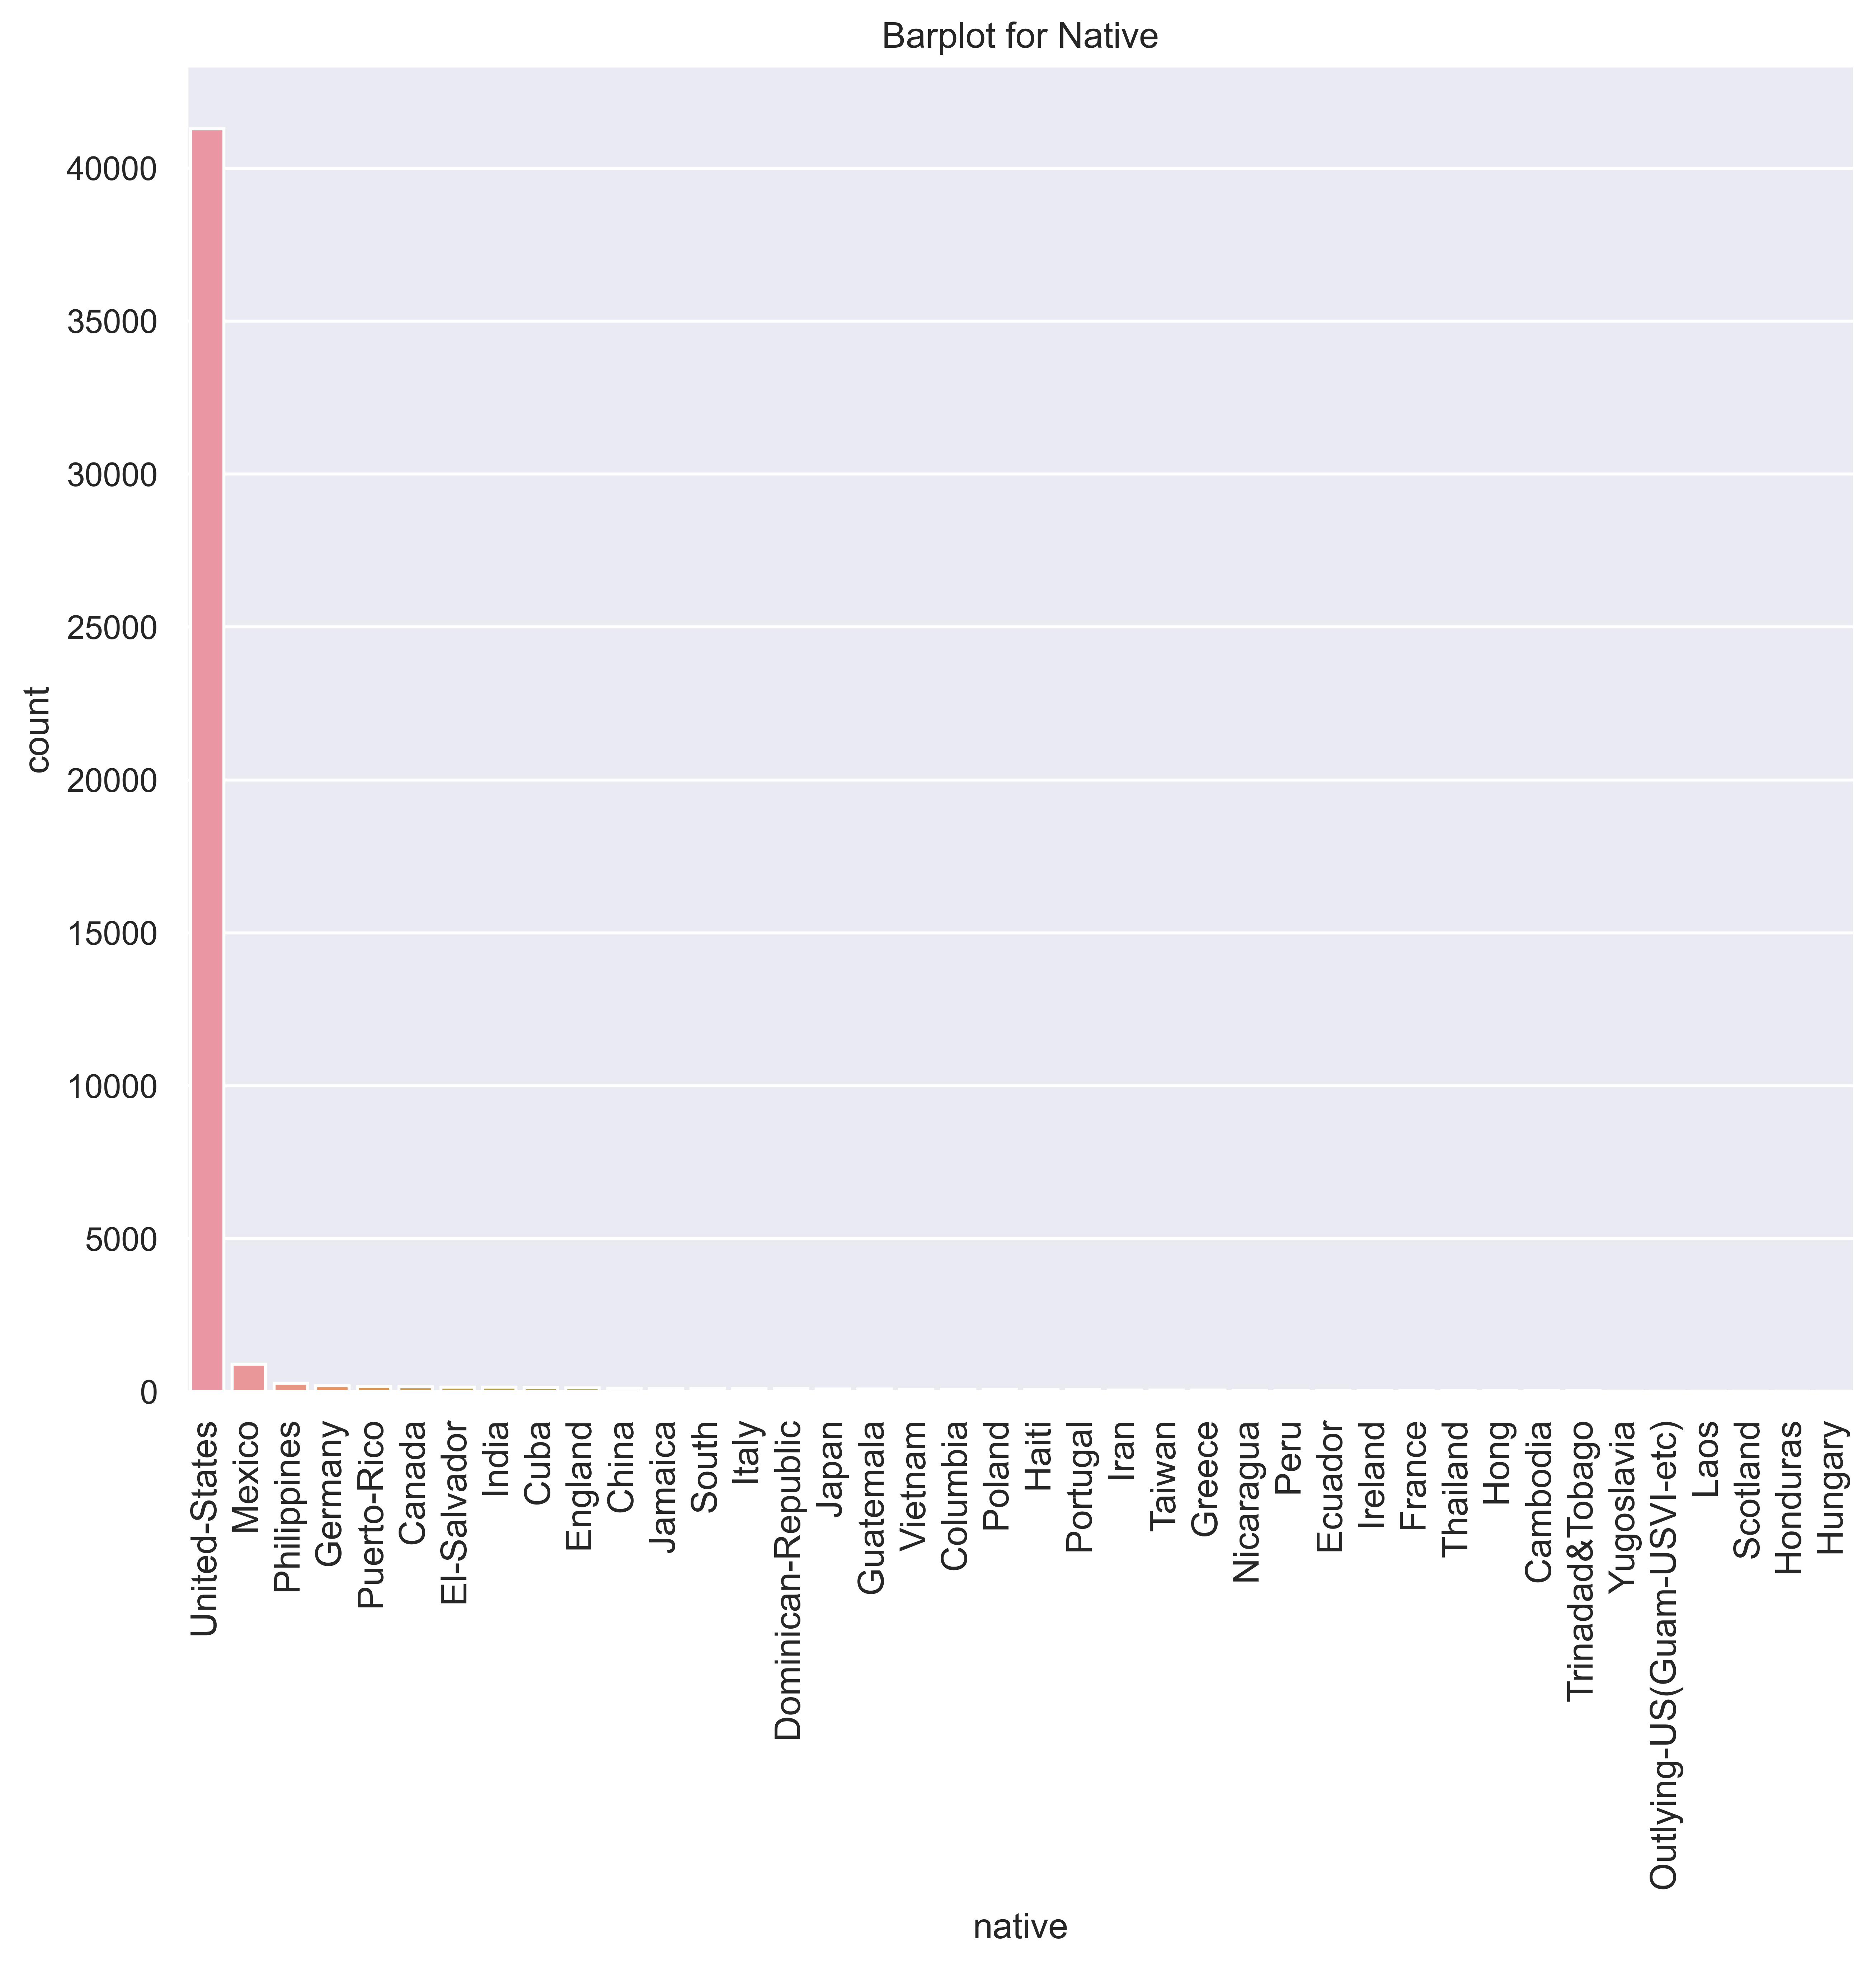

In [14]:
sns.countplot(x = df['native'], order= df['native'].value_counts().index)
plt.xticks(fontsize = 12 ,rotation= 90)
plt.title('Barplot for Native')

hoursperweek       Axes(0.125,0.11;0.227941x0.77)
capitalgain     Axes(0.398529,0.11;0.227941x0.77)
capitalloss     Axes(0.672059,0.11;0.227941x0.77)
dtype: object

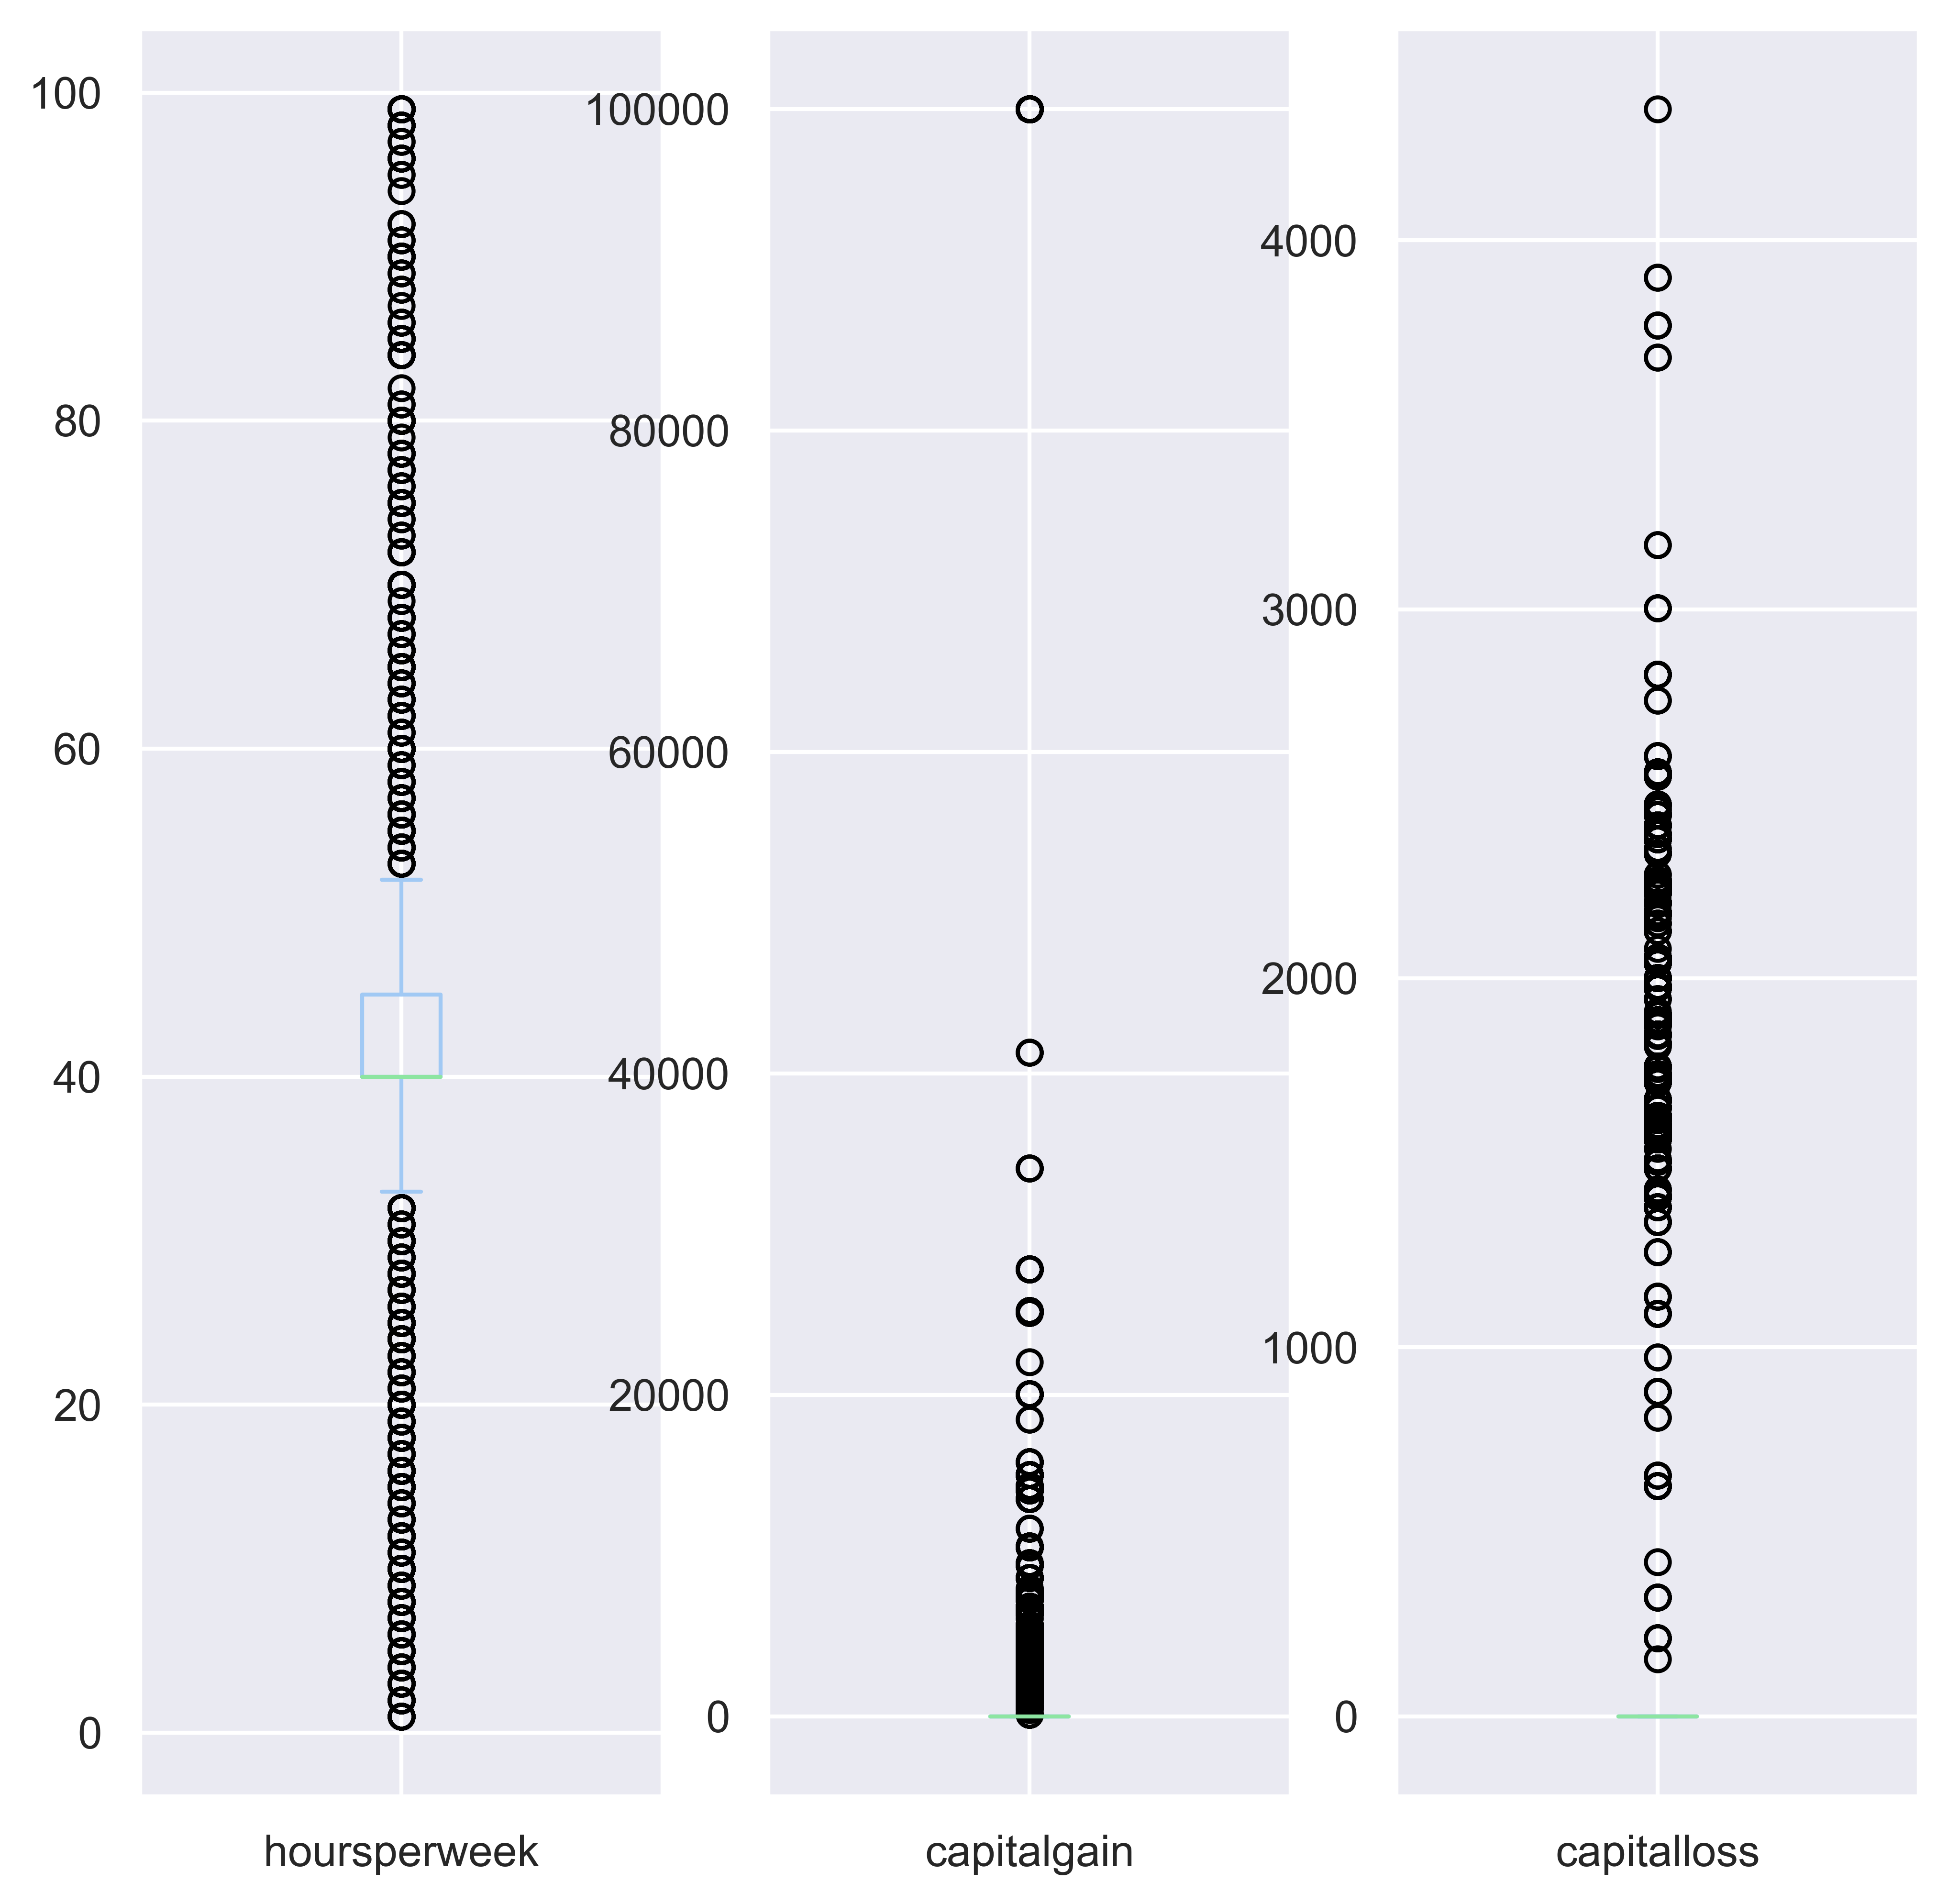

In [15]:
df[['hoursperweek','capitalgain','capitalloss']].plot(kind = 'box', figsize = (8,8), subplots = True)

<Axes: ylabel='Salary'>

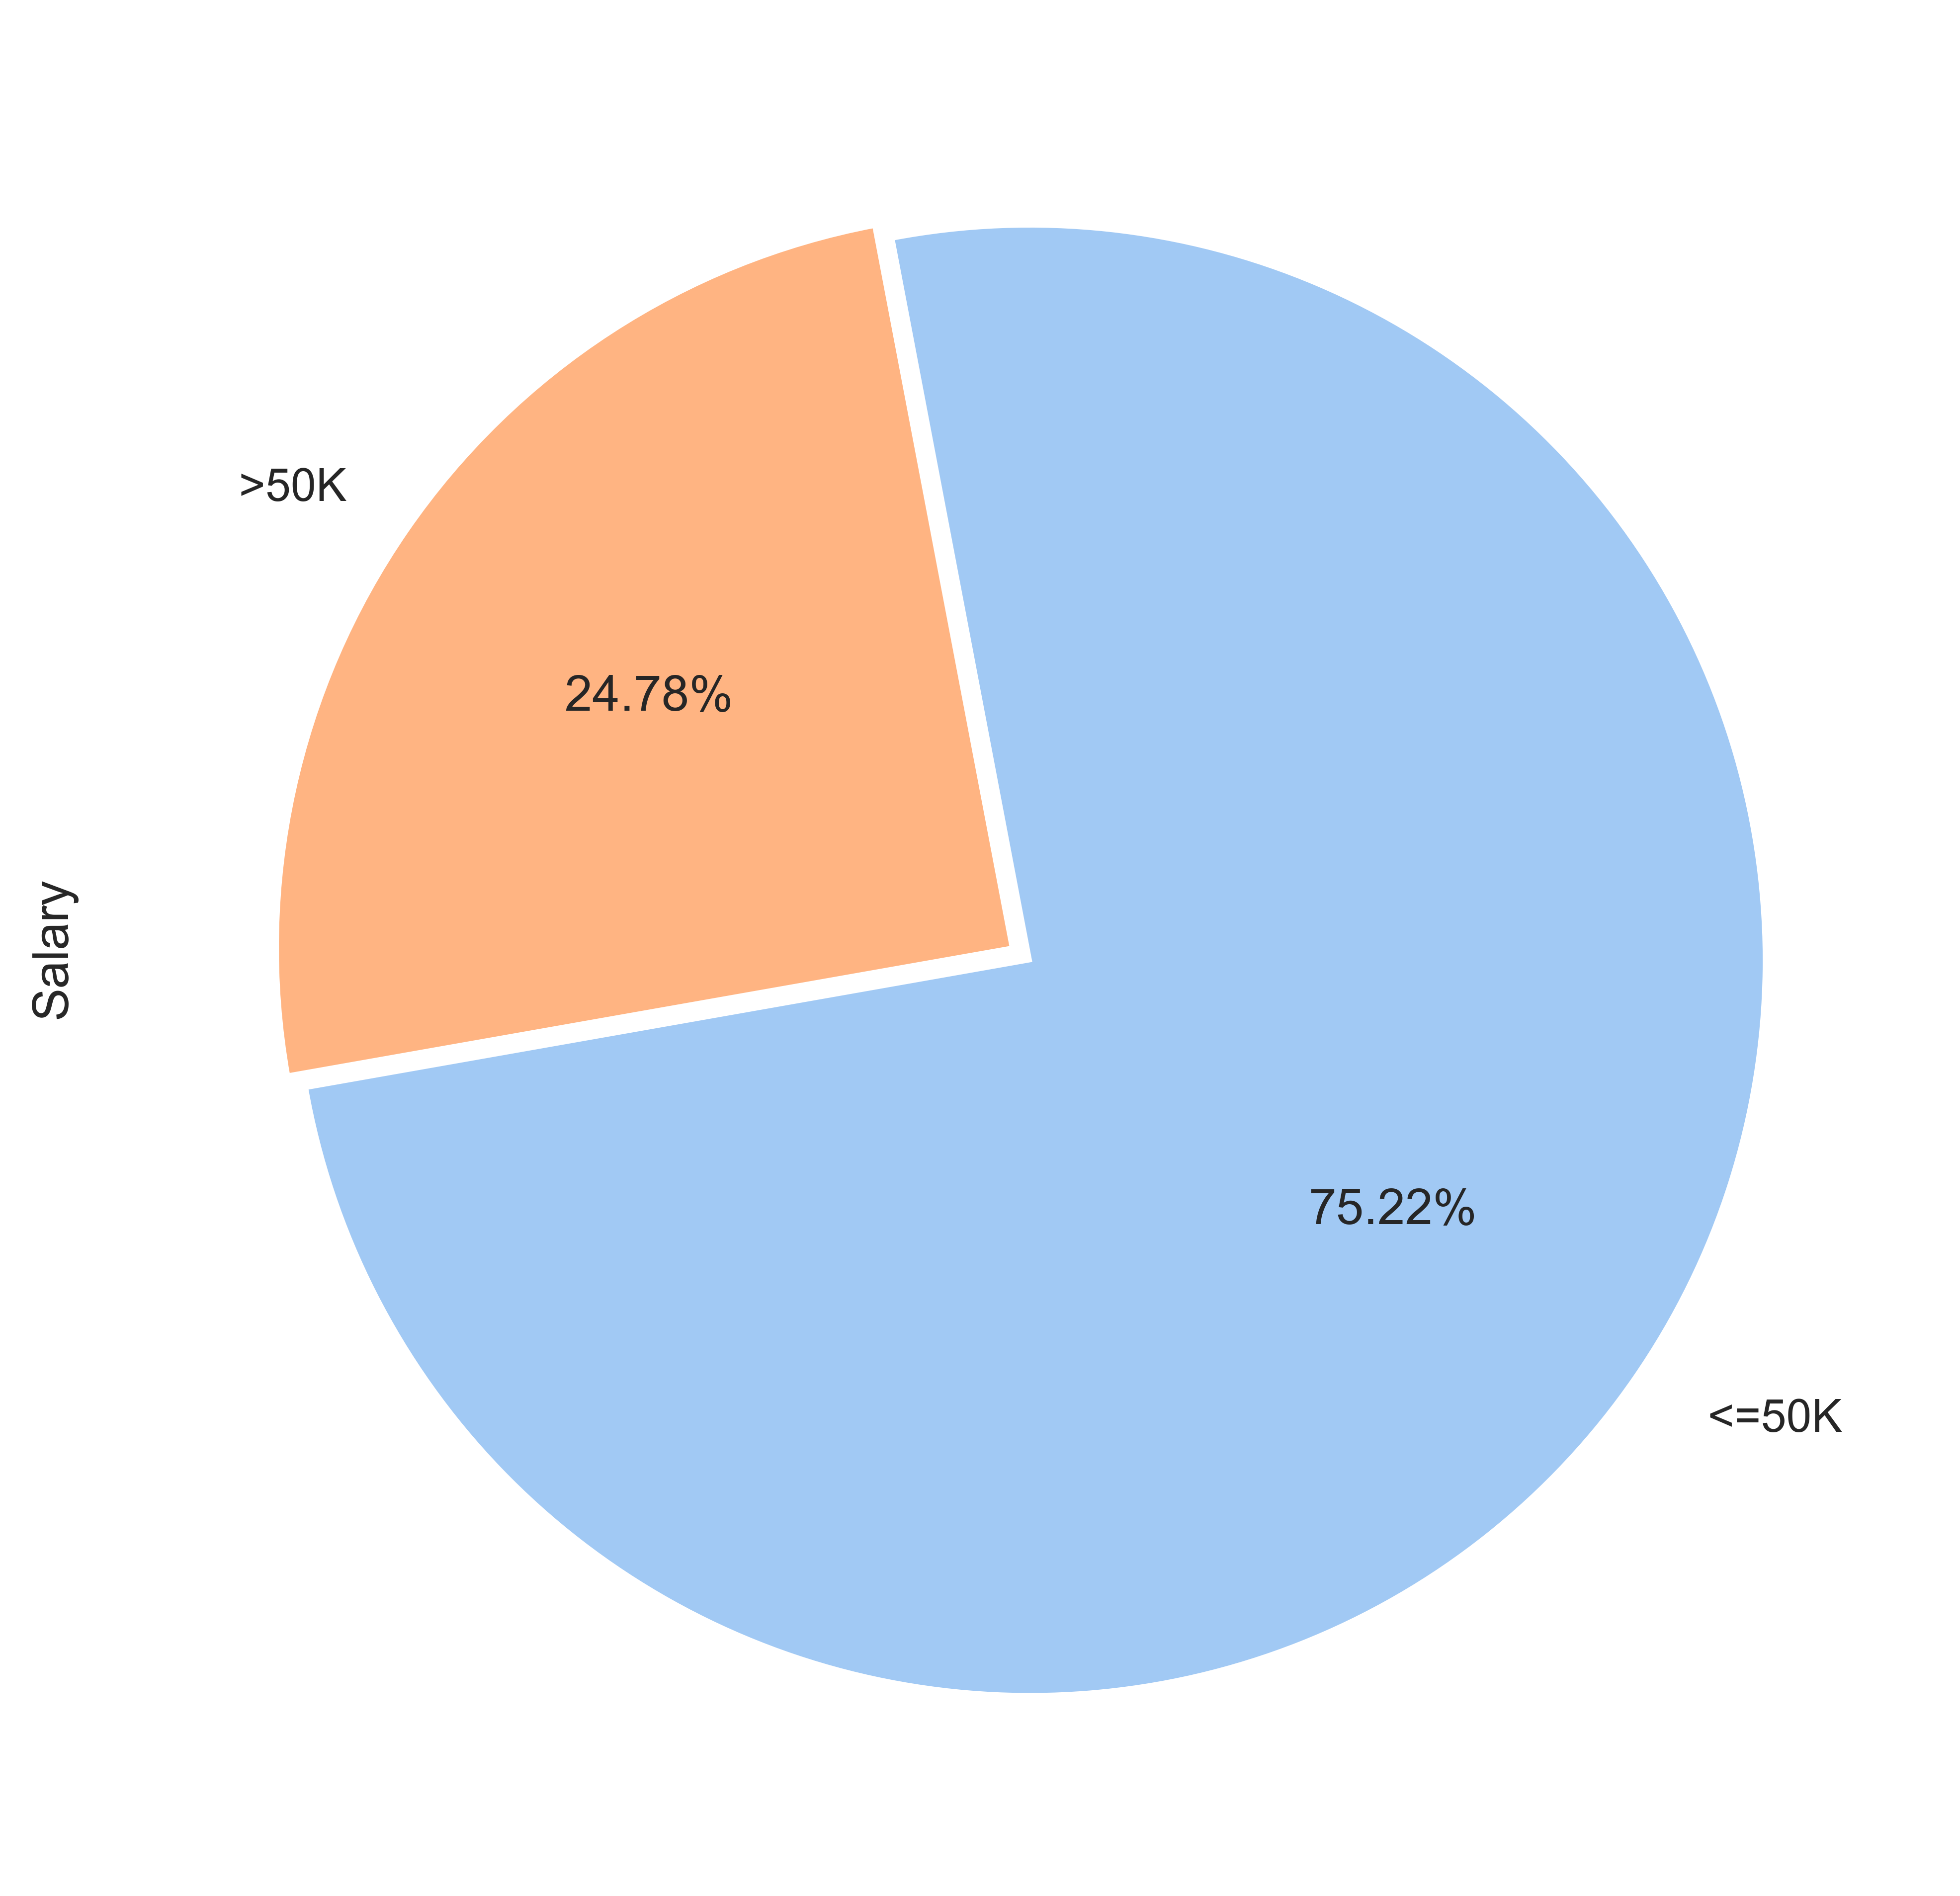

In [16]:
# Plottig Target Variable:
df['Salary'].value_counts().plot(kind= 'pie', autopct= '%0.2f%%', explode= [0.03,0.0],startangle= 190)

> * #### From heatmap we can observe non of the numerical variables are highly correlated.
> * #### Majority of data belong to age 20 to 40.
> * #### People working in private are in hugh number.
> * #### Male category have high percentage than females.
> * #### We can observe lot of outliers in numerical variables.
> * #### Majority of people (75%) have less than 50k salary.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Encoding:

In [17]:
# Encoding Target Variable using Lable Encoding:
le = LabelEncoder()
df['Salary'] = le.fit_transform(df['Salary'])
df['Salary'].value_counts()

0    34013
1    11208
Name: Salary, dtype: int64

In [18]:
x = df.iloc[:,:-1]
y = df['Salary']

In [19]:
cat_var = x.select_dtypes('object').columns
cat_var

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [20]:
# Encoding Independent Variables using Ordinal Encoder:
oe = OrdinalEncoder()
x[cat_var] = oe.fit_transform(x[cat_var])
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0


### <font color = "green">➡ Standardisation:

In [21]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.03418971,  2.91768179, -0.34404887, ..., -0.21872833,
        -0.07812093,  0.26444339],
       [ 0.86639866,  1.87397267, -0.34404887, ..., -0.21872833,
        -2.32671417,  0.26444339],
       [-0.04146565, -0.21344557,  0.17992971, ..., -0.21872833,
        -0.07812093,  0.26444339],
       ...,
       [-0.04146565, -0.21344557, -0.34404887, ..., -0.21872833,
         0.75469138,  0.26444339],
       [ 0.4124665 , -0.21344557, -0.34404887, ..., -0.21872833,
        -0.07812093,  0.26444339],
       [-0.26843172,  0.83026355, -0.34404887, ..., -0.21872833,
         1.58750369,  0.26444339]])

### <font color = "green">➡ Train Test Split 

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [23]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (33915, 13)
Shape of x_test:  (11306, 13)
Shape of y_train:  (33915,)
Shape of y_test (11306,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [24]:
svm = SVC()
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [25]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8513
           1       0.74      0.56      0.64      2793

    accuracy                           0.84     11306
   macro avg       0.80      0.75      0.77     11306
weighted avg       0.84      0.84      0.84     11306



In [26]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 84.31%


In [27]:
print(f'Tranning Score: {svm.score(xtrain,ytrain)}')
print(f'Testing Score:{svm.score(xtest,ytest)}')

Tranning Score: 0.851953412944125
Testing Score:0.8430921634530338


> * #### With default value of Regularization parameter (C) = 1.0, kernel ='rbf', degree = 3 we get 84% of accuracy, let's see accuracy after hyperparameter tunning.     
> * #### The strength of the regularization is inversely proportional to C. Must be strictly positive.

___

* ### <font color = 'blue'> <u> HYPERPARAMETER TUNNING </u>
    
    + #### As the Hpyerparameter Tunning with GridSearchCV taking hugh time for computation

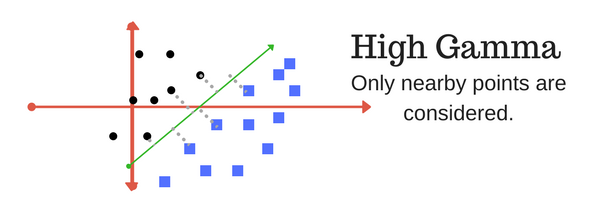
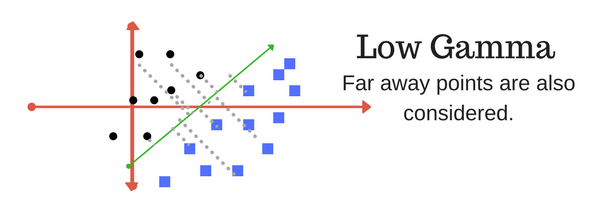

**LOW REGULARISATION VALUE**
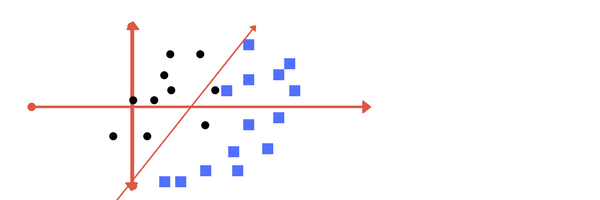
**HIGH REGULARISATION VALUE**
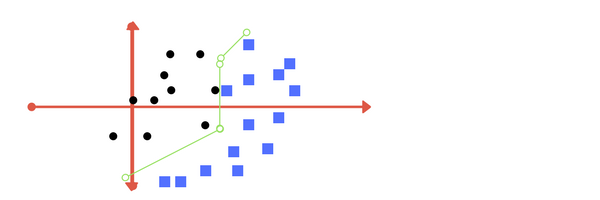

* We should choose High Regularisation Value and Low Gamma Value for maximum accuracy

* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### With Support Vector Machine(SVM) with default parameters we get 85% Training Accuracy and 84% Testing Accuracy, which could be increased after hyperparameter tunning
> * #### This concludes that SVM works like majic on Classification Problems with high accuracy.
> * #### Effective on datasets with multiple feature i.e. effective in the higher dimension.
> * #### The hyperplane is affected by only the support vectors thus outliers have less impact.
> * #### It performs well for relatively small datasets.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___